# **Part 1: Setup**

Hello! Welcome to our Google Colab notebook for our machine learning project, ***Binary Classification of Water-immersed and Oil-immersed Electrodes Across Neural Network Models***. Let's get started! 😀🐄

## Getting our Dataset

This project's dataset is uploaded on the authors' [Github Repository](https://github.com/aritako/binary-signal-classification/blob/main/dataset.csv). That way, we can run the `wget` shell command for remote access of our dataset. This eliminates the need for mounting the dataset to Google Drive, which may cause some complications when working in a collaborative environment.

In [ ]:
!wget -q https://raw.githubusercontent.com/aritako/binary-signal-classification/main/dataset.csv

## Importing Initial Dependencies
Then, we import our initial dependencies for this project—`pandas`, `numpy` and `tensorflow`. We'll be importing more dependencies along the way as we continue on with this project.

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [ ]:
print("TensorFlow version:", tf.__version__)
print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)

TensorFlow version: 2.15.0
NumPy version: 1.25.2
Pandas version: 2.0.3


It's important to have reproducible results. Thus, we must configure `tensorflow` to be set at a certain random seed, and enable its determinism. That way, we can play around with our model to achieve an optimal output.

In [ ]:
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

## Quick Check

Let's check if we have successfully retrieved our dataset.

In [ ]:
df = pd.read_csv('dataset.csv', delimiter = ";")
df.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,target
0,38.29,38.29,38.29,38.29,38.29,38.29,38.66,38.66,38.66,38.66,1
1,39.03,38.66,39.03,39.03,39.03,39.03,39.03,39.03,39.03,39.03,1
2,39.41,39.41,39.41,39.41,39.41,39.41,39.78,39.41,39.78,39.78,1
3,39.78,39.78,39.78,39.78,40.15,40.15,40.15,40.15,40.15,40.15,1
4,40.52,40.52,40.52,40.52,40.52,40.52,40.52,40.52,40.52,40.52,1


# **Part 2: Exploratory Data Analysis**

Before training our model, let us first investigate our dataset so that we can gain some insight with the data we'll be working with.

## Understanding the Structure of the Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col1    4475 non-null   float64
 1   col2    4475 non-null   float64
 2   col3    4475 non-null   float64
 3   col4    4475 non-null   float64
 4   col5    4475 non-null   float64
 5   col6    4475 non-null   float64
 6   col7    4475 non-null   float64
 7   col8    4475 non-null   float64
 8   col9    4475 non-null   float64
 9   col10   4475 non-null   float64
 10  target  4475 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 384.7 KB


In [ ]:
df.describe()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,target
count,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000
mean,40.242163,40.241703,40.243537,40.246246,40.254878,40.258060,40.256577,40.258404,40.269526,40.268711,0.148156
std,35.429036,35.429118,35.427647,35.427066,35.422751,35.422279,35.422088,35.423766,35.418881,35.420502,0.989074
min,1.130000,1.130000,1.130000,1.130000,1.130000,1.130000,1.130000,1.130000,1.130000,1.130000,-1.000000
25%,2.070000,2.070000,2.070000,2.070000,2.070000,2.070000,2.070000,2.070000,2.070000,2.070000,-1.000000
50%,35.060000,35.060000,35.060000,35.060000,35.060000,35.060000,35.060000,35.070000,35.060000,35.230000,1.000000
75%,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,1.000000
max,85.190000,85.190000,85.190000,85.190000,85.190000,85.190000,85.190000,85.190000,85.190000,85.190000,1.000000


So far, we can observe that we have **4475 rows and 11 columns.** The range of values we'll be working with per column is within the range of [1.13, 85.19], with the mean being around 40.

Let's try and find out how many electrode signals are made in water (represented by 1) or oil (represented by -1).





In [ ]:
df['target'].value_counts()

target
 1    2569
-1    1906
Name: count, dtype: int64

We have **2569 signals** and **1906 signals** for water-immersed and oil-immersed electrodes, respectively. For better integration with our neural network models, we replace -1 with 0.

In [ ]:
df['target'] = df['target'].replace({-1: 0})
df['target'].value_counts()

target
1    2569
0    1906
Name: count, dtype: int64

We can now see that -1 is represented by 0. Next, let's check for any null values.

In [ ]:
df.isnull().sum()

col1      0
col2      0
col3      0
col4      0
col5      0
col6      0
col7      0
col8      0
col9      0
col10     0
target    0
dtype: int64

Nice! We do not need to perform any imputations since there are no null values.

## Visualizing the Dataset
To gain further insight about our data, we can use `seaborn` and `matplotlib` to visualize the dataset through graphs.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Let's try and use **Histograms** to plot each feature. The X-axis corresponds to the feature values of the `nth`-column, while the Y-axis corresponds to the count occurrence.


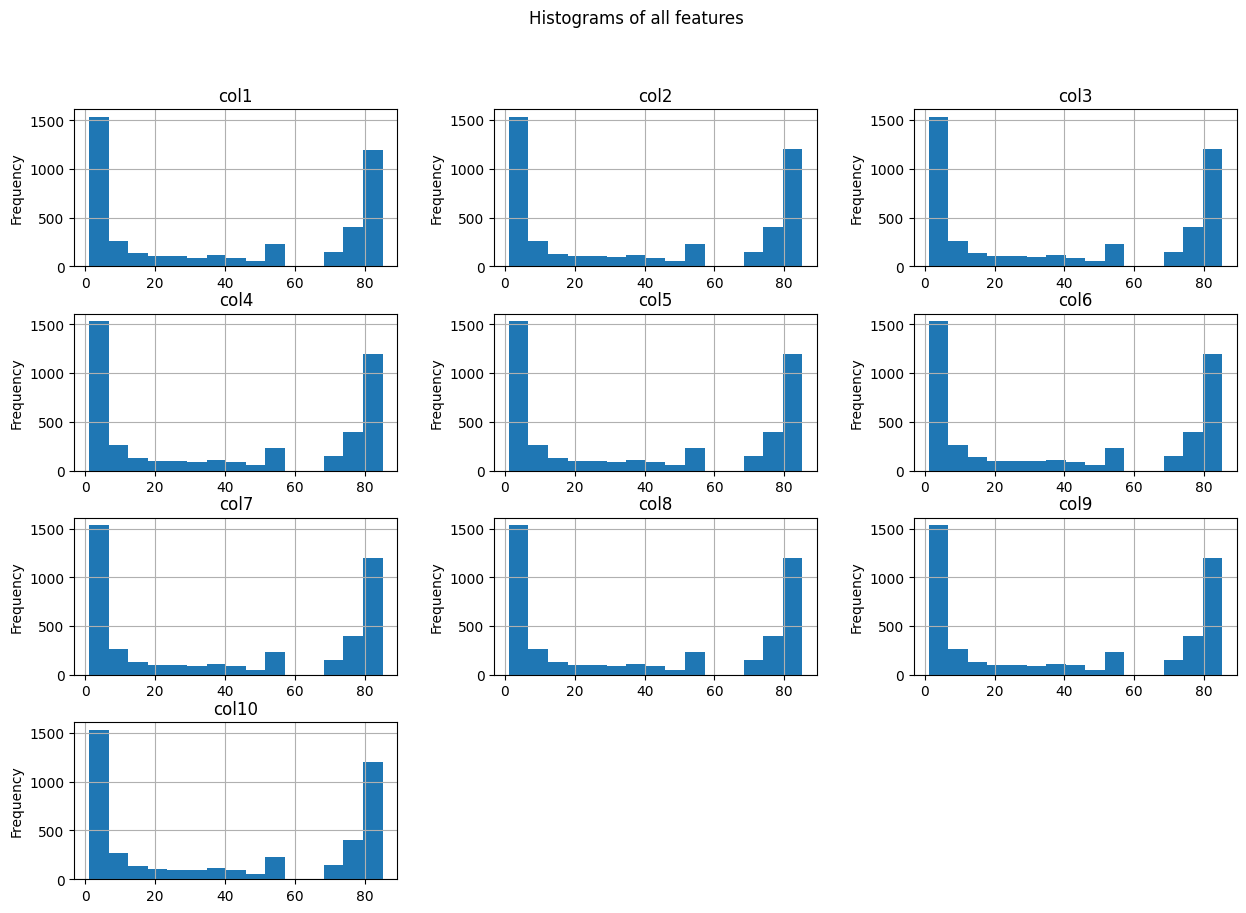

In [ ]:
df.iloc[:, :-1].hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of all features')
for ax in plt.gcf().axes:
    ax.set_ylabel('Frequency')
plt.show()

We already checked the count values of our target column. Let's try visualizing the distribution of our classes.

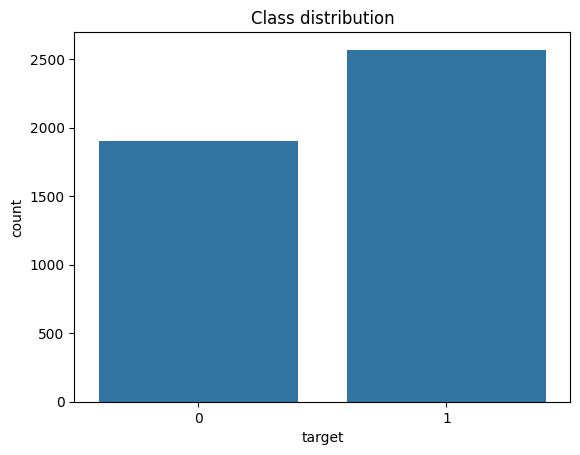

In [ ]:
df['target'].value_counts()
sns.countplot(x='target', data=df)
plt.title('Class distribution')
plt.show()

Finally, let's use a **Correlation Matrix** to understand the relationships between our variables.

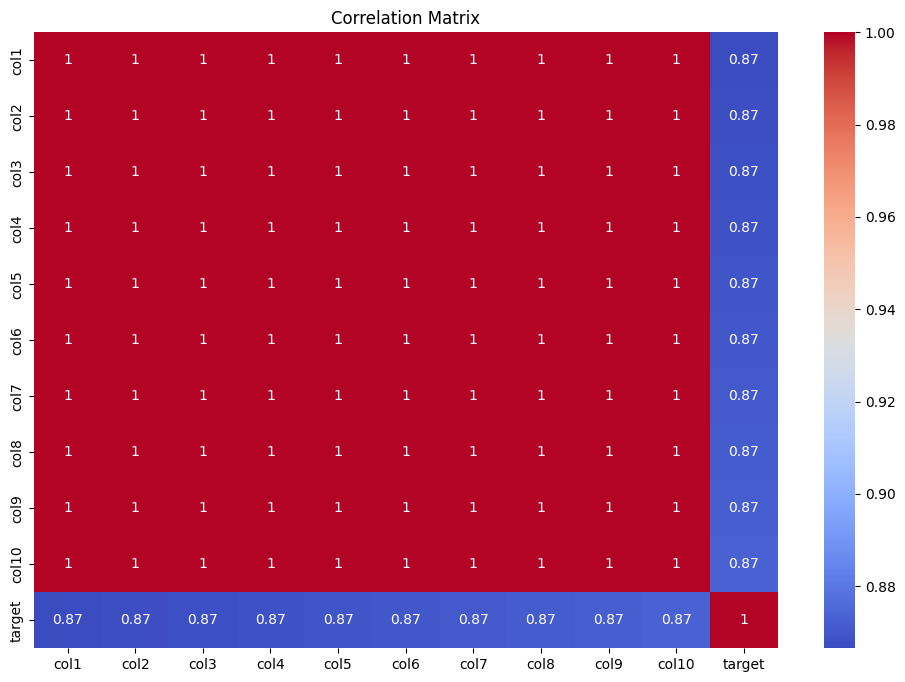

In [ ]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

We have a very interesting output! This correlation matrix indicates a perfect correlation (correlation coefficient of 1) among all feature columns (col1 to col10), suggesting that they have identical or highly similar values. The target column also shows a high correlation (0.87) with the feature columns, indicating a strong relationship between the features and the target variable.


---


From our exploratory data analysis, we can conclude that our data is already in good shape, and we don't need any further preprocessing of data! Let's proceed with setting up our datasets for training our models.


# **Part 3: Preparing our Train and Test Dataset**

Let's begin by importing the necessary libraries for splitting our data—`sklearn`.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Let's separate our dataset between the features and the target, i.e. `X` and `y`.

In [ ]:
X = df.drop("target", axis = 1)
y = df["target"]

With that, we can conveniently split our dataset usign the the `sklearn` method, `train_test_split`. We allocate **70% of our data for training, 10% for validation, and 20% for testing**. The distribution is also stratified to maintain the distribution of the target values in each set.

In [ ]:
# Split into training+validation (80%) and test (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split training+validation into training (70%) and validation (10%)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.125, random_state=42)

# Finally, 70% Training Data, 10% Validation Data, 20% Testing Data
print("Train Set Count:", len(X_train))
print("Validation Set Count:", len(X_val))
print("Test Set Count:", len(X_test))

Train Set Count: 3132
Validation Set Count: 448
Test Set Count: 895


Now that the dataset has been split accordingly, we can then proceed to normalizing our data using our scaler. We will be using the `StandardScaler ` offered by the `sklearn` library. This will ensure that the features have a standard distribution, meaning its `mean=0` and `variance=1` for equal contribution of features to the result.

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled)
print(X_test_scaled)
print(X_val_scaled)

[[ 1.24339303  1.24336582  1.25577577 ...  1.24306062  1.24289127
   1.24288185]
 [ 1.2185525   1.2185247   1.2185112  ...  1.21821278  1.21804062
   1.21803071]
 [-0.40455046 -0.40461674 -0.39431073 ... -0.39491986 -0.39527441
  -0.38486815]
 ...
 [-0.21006038 -0.22451861 -0.2435586  ... -0.31981164 -0.32975908
  -0.34392024]
 [-0.06073491 -0.06079304 -0.06090574 ... -0.06145064 -0.06176748
  -0.05135449]
 [-0.84208256 -0.83171465 -0.83188713 ... -0.84302795 -0.83298459
  -0.83303596]]
[[1.1533461  1.15331675 1.1532982  ... 1.15298722 1.15280769 1.15279645]
 [1.1533461  1.15331675 1.1532982  ... 1.15298722 1.15280769 1.15279645]
 [1.15447522 1.1544459  1.15442743 ... 1.15411667 1.15393726 1.15392605]
 ...
 [1.12455367 1.12452364 1.12450285 ... 1.12418632 1.12400353 1.12399172]
 [1.1533461  1.15331675 1.1532982  ... 1.15298722 1.15280769 1.15279645]
 [0.42365547 0.42360882 0.42353368 ... 0.42308211 0.42282005 0.42279406]]
[[-1.08710054 -1.087183   -1.08737529 ... -1.08811794 -1.0885508

# **Part 4: Model Definitions**

At this point, we will now be building our models! We will be defining three Neural Networks: **Multilayer Perceptron (MLP)**, **Convolutional Neural Network (CNN)**, and **Recurrent Neural Networks.** Let's import the neccesary libraries from `tensorflow.keras`.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, LSTM, Reshape, Dropout, BatchNormalization

## General Design Decisions

For our initial model, we will be using **`ReLU`** for the activation function, as it is the most widely used function in most scenarios. However, we will also play around with other functions in hyperparameter tuning.

What we are going to fix throughout the process are the following.

The model is compiled using **`adam`**, which is a standard optimizer for Neural Networks.

The models utilize the **Binary Cross Entropy** as it is the best loss function used for binary classification.

The metric we'll be focusing on is the **`accuracy`** of the model in its prediction.

## Multilayer Perceptron

We first set up 10 neurons for the input layer, matching the dimensions of our input data (10 feature columns). Next, we incorporate a single 64-neuron hidden layer. Our initial exploration of the dataset may deem the use of a single hidden layer as already sufficient. Though, we may modify this later based on the results. Last, we have our output layer with a single neuron, outputting a 0 or a 1.



In [ ]:
def build_mlp(input_shape, num_layers=1, hidden_units=64, activation='relu', output_activation='relu', learning_rate=0.001, loss='binary_crossentropy', metrics=['accuracy']):
    model = Sequential()
    model.add(Dense(10, input_shape=input_shape, activation=activation))
    for _ in range(num_layers):
      model.add(Dense(hidden_units, activation=activation))
    model.add(Dense(1, activation=output_activation))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss=loss, metrics=metrics)
    return model

mlp = build_mlp(input_shape=(X_train_scaled.shape[1],), num_layers=1, hidden_units=64, activation='relu', output_activation='relu', learning_rate=0.001, loss='binary_crossentropy', metrics=['accuracy'])
mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 64)                704       
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 879 (3.43 KB)
Trainable params: 879 (3.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Convolutional Neural Network
We set up the CNN with an input layer matching the 10 feature columns of our data. A Conv1D layer with 32 filters and a kernel size of 3 follows, to capture local patterns in the features. We then apply max pooling to reduce dimensionality. The output is flattened and passed through a 64-neuron dense layer. Finally, the output layer has a single neuron, outputting a 0 or 1.

In [ ]:
def build_cnn(input_shape, filters=32, kernel_size=3, pool_size=2, hidden_units=64, activation='relu', output_activation='relu', learning_rate=0.001, loss='binary_crossentropy', metrics=['accuracy']):
    model = Sequential()
    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation=activation, input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Flatten())
    model.add(Dense(hidden_units, activation=activation))
    model.add(Dense(1, activation=output_activation))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss=loss, metrics=metrics)
    return model

cnn = build_cnn(input_shape=(X_train_scaled.shape[1], 1), filters=32, kernel_size=3, pool_size=2, hidden_units=64, activation='relu', output_activation='relu', learning_rate=0.001, loss='binary_crossentropy', metrics=['accuracy'])
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 8, 32)             128       
                                                                 
 max_pooling1d (MaxPooling1  (None, 4, 32)             0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8449 (33.00 KB)
Trainable params: 8449 (33.00 KB)
Non-trainable params: 0 (0.00 Byte)
____________________

## Recurrent Neural Network
The RNN starts with an input layer matching the 10 feature columns. We reshape the input to be suitable for the LSTM layer, which consists of 50 units, to capture temporal dependencies and sequential patterns in the features. The output is then passed to a single neuron output layer, producing a 0 or 1.

In [ ]:
def build_rnn(input_shape, lstm_units=50, dropout=0.5, activation='relu', output_activation='relu', learning_rate=0.001, loss='binary_crossentropy', metrics=['accuracy']):
    optimizer = Adam()  # Fixed optimizer as Adam

    model = Sequential()
    model.add(Reshape((input_shape[0], 1), input_shape=input_shape))
    model.add(LSTM(lstm_units, activation=activation))
    model.add(Dropout(dropout))
    model.add(Dense(1, activation=output_activation))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss=loss, metrics=metrics)
    return model

rnn = build_rnn(input_shape=(X_train_scaled.shape[1], 1), lstm_units=50, dropout=0.5, activation='relu', output_activation='relu', learning_rate=0.001, loss='binary_crossentropy', metrics=['accuracy'])
rnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 10, 1)             0         
                                                                 
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# **Part 5: Initial Model Training and Evaluation**

Let's head on to training the models! For now, we are fixing the epochs to 20 and the batch size to 32.

In [ ]:
mlp_history = mlp.fit(X_train_scaled, y_train, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
98/98 [==============================] - 3s 9ms/step - loss: 1.0878 - accuracy: 0.5951 - val_loss: 0.3640 - val_accuracy: 0.7924
Epoch 2/20
98/98 [==============================] - 1s 8ms/step - loss: 0.2238 - accuracy: 0.8697 - val_loss: 0.1878 - val_accuracy: 0.8661
Epoch 3/20
98/98 [==============================] - 1s 11ms/step - loss: 0.4149 - accuracy: 0.7829 - val_loss: 0.4976 - val_accuracy: 0.6094
Epoch 4/20
98/98 [==============================] - 1s 8ms/step - loss: 0.3240 - accuracy: 0.8573 - val_loss: 0.2510 - val_accuracy: 0.9263
Epoch 5/20
98/98 [==============================] - 1s 13ms/step - loss: 0.1771 - accuracy: 0.9243 - val_loss: 0.1793 - val_accuracy: 0.9062
Epoch 6/20
98/98 [==============================] - 1s 12ms/step - loss: 0.1520 - accuracy: 0.9231 - val_loss: 0.1717 - val_accuracy: 0.9152
Epoch 7/20
98/98 [==============================] - 1s 7ms/step - loss: 0.1439 - accuracy: 0.9320 - val_loss: 0.1835 - val_accuracy: 0.9263
Epoch 8/20
98/98 

In [ ]:
cnn_history = cnn.fit(X_train_scaled.reshape(-1, X_train_scaled.shape[1], 1), y_train, epochs=20, batch_size=32, verbose=1)


Epoch 1/20
98/98 [==============================] - 1s 4ms/step - loss: 0.2953 - accuracy: 0.8898 - val_loss: 0.3002 - val_accuracy: 0.8973
Epoch 2/20
98/98 [==============================] - 0s 3ms/step - loss: 0.2060 - accuracy: 0.9518 - val_loss: 0.2042 - val_accuracy: 0.9464
Epoch 3/20
98/98 [==============================] - 0s 2ms/step - loss: 0.2136 - accuracy: 0.9575 - val_loss: 0.2163 - val_accuracy: 0.9554
Epoch 4/20
98/98 [==============================] - 0s 2ms/step - loss: 0.3018 - accuracy: 0.9128 - val_loss: 0.1885 - val_accuracy: 0.9442
Epoch 5/20
98/98 [==============================] - 0s 2ms/step - loss: 0.1487 - accuracy: 0.9547 - val_loss: 0.2698 - val_accuracy: 0.9353
Epoch 6/20
98/98 [==============================] - 0s 2ms/step - loss: 0.1481 - accuracy: 0.9588 - val_loss: 0.1187 - val_accuracy: 0.9487
Epoch 7/20
98/98 [==============================] - 0s 2ms/step - loss: 0.1204 - accuracy: 0.9604 - val_loss: 0.1650 - val_accuracy: 0.9487
Epoch 8/20
98/98 [==

In [ ]:
rnn_history = rnn.fit(X_train_scaled, y_train, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
98/98 [==============================] - 3s 12ms/step - loss: 0.7792 - accuracy: 0.7312 - val_loss: 0.2010 - val_accuracy: 0.9286
Epoch 2/20
98/98 [==============================] - 1s 9ms/step - loss: 0.2826 - accuracy: 0.9496 - val_loss: 0.3162 - val_accuracy: 0.9330
Epoch 3/20
98/98 [==============================] - 1s 9ms/step - loss: 0.2793 - accuracy: 0.9486 - val_loss: 0.1843 - val_accuracy: 0.9442
Epoch 4/20
98/98 [==============================] - 1s 7ms/step - loss: 0.2565 - accuracy: 0.9518 - val_loss: 0.2644 - val_accuracy: 0.9464
Epoch 5/20
98/98 [==============================] - 1s 6ms/step - loss: 0.2426 - accuracy: 0.9387 - val_loss: 0.1851 - val_accuracy: 0.9263
Epoch 6/20
98/98 [==============================] - 1s 6ms/step - loss: 0.2539 - accuracy: 0.9425 - val_loss: 0.2116 - val_accuracy: 0.9263
Epoch 7/20
98/98 [==============================] - 1s 5ms/step - loss: 0.2133 - accuracy: 0.9489 - val_loss: 0.2270 - val_accuracy: 0.9464
Epoch 8/20
98/98 [=

## Initial Model Evaluation

Oooh! Those numbers look good for our initial models! Let's set these as our baseline values.

In [ ]:
mlp_eval = mlp.evaluate(X_val_scaled, y_val, verbose=1)
cnn_eval = cnn.evaluate(X_val_scaled.reshape(-1, X_val_scaled.shape[1], 1), y_val, verbose=1)
rnn_eval = rnn.evaluate(X_val_scaled, y_val, verbose=1)

28/28 [==============================] - 0s 3ms/step - loss: 0.2035 - accuracy: 0.9654


# **Part 6: Hyperparameter Tuning**

Now, let's try improving our accuracies with hyperparameter tuning. We will be doing a simple Grid Search to try out all combinations of the hyperparameters we want to test.

To do that, we import the `ParameterGrid` from the `sklearn` library.

In [ ]:
from sklearn.model_selection import ParameterGrid

## Setting Up the Parameter Grids

Time to set up the parameter grids!

For MLP, we'd mostly want to play around the number of layers, hidden units, and the output activation function, so here are some values we are going to try.

In [ ]:
mlp_param_grid = {
    'num_layers': [1, 2, 3],
    'hidden_units': [32, 64, 128],
    'output_activation': ['relu', 'sigmoid'],
    #'learning_rate': [0.001, 0.01],      // We're skipping this part for now to save time and computing power :(
}

For CNN, we want to focus on experimenting with the number of filters and hidden units, the kernel and pooling sizes, and the output activation function as well.

In [ ]:
cnn_param_grid = {
    'filters': [32, 64],
    'kernel_size': [2, 3],
    'pool_size': [2, 3],
    'hidden_units': [32, 64],
    #'learning_rate': [0.001, 0.01],     // We're skipping this part for now to save time and computing power :(
    'output_activation': ['relu', 'sigmoid'],
}

For RNN, we are going to try different values for their LSTM units, dropout rate, and activation functions in both the hidden layers and output layer.

In [ ]:
rnn_param_grid = {
    'lstm_units': [32, 64, 128],
    'dropout': [0.3, 0.5],
    'activation': ['tanh', 'relu'],
    'output_activation': ['sigmoid', 'relu'],
    #'learning_rate': [0.001, 0.01]     // We're skipping this part for now to save time and computing power :(
}

## Parameter Tuning with Grid Search

Now that we have all those grids set up, we are going to use this `tune` function that will build, train, and evaluate the model all in one. This is the function we are going to call in going through all the combinations of the hyperparameters.

In [ ]:
def tune(model_builder, params):
    model = model_builder(input_shape=(X_train_scaled.shape[1], 1), **params)
    history = model.fit(X_train_scaled.reshape(-1, X_train_scaled.shape[1], 1), y_train, epochs=25, batch_size=32)
    scores = model.evaluate(X_val_scaled.reshape(-1, X_val_scaled.shape[1], 1), y_val)
    score = scores[-1]
    return score

### Best Parameters for MLP

Let's find the best parameters for MLP! This function will go through all the combinations from the grid we made earlier and get the set of parameters that will yield the best accuracy!

In [ ]:
best_score = -1
mlp_best_params = None

for params in ParameterGrid(mlp_param_grid):
    score = tune(build_mlp, params)

    if score > best_score:
        best_score = score
        mlp_best_params = params

Epoch 1/25
98/98 [==============================] - 1s 2ms/step - loss: 8.8403 - accuracy: 0.4269
Epoch 2/25
98/98 [==============================] - 0s 2ms/step - loss: 8.8403 - accuracy: 0.4269
Epoch 3/25
98/98 [==============================] - 0s 2ms/step - loss: 8.8403 - accuracy: 0.4269
Epoch 4/25
98/98 [==============================] - 0s 2ms/step - loss: 8.8403 - accuracy: 0.4269
Epoch 5/25
98/98 [==============================] - 0s 2ms/step - loss: 8.8403 - accuracy: 0.4269
Epoch 6/25
98/98 [==============================] - 0s 2ms/step - loss: 8.8403 - accuracy: 0.4269
Epoch 7/25
98/98 [==============================] - 0s 2ms/step - loss: 8.8403 - accuracy: 0.4269
Epoch 8/25
98/98 [==============================] - 0s 2ms/step - loss: 8.8403 - accuracy: 0.4269
Epoch 9/25
98/98 [==============================] - 0s 2ms/step - loss: 8.8403 - accuracy: 0.4269
Epoch 10/25
98/98 [==============================] - 0s 2ms/step - loss: 8.8403 - accuracy: 0.4269
Epoch 11/25
98/98 [

Interesting! Here are the parameters that got the best results from the grid search.

In [ ]:
print(f"Best Score: {best_score}, Best Parameters for MLP: {mlp_best_params}")

NameError: name 'best_score' is not defined

### Best Parameters for CNN

Similarly, we're doing the same thing for CNN! I wonder what parameters will be give the best output for this model... 🤔

In [ ]:
best_score = -1
cnn_best_params = None

for params in ParameterGrid(cnn_param_grid):
    score = tune(build_cnn, params)

    if score > best_score:
        best_score = score
        cnn_best_params = params

Epoch 1/25
98/98 [==============================] - 1s 2ms/step - loss: 4.3957 - accuracy: 0.5971
Epoch 2/25
98/98 [==============================] - 0s 2ms/step - loss: 0.2303 - accuracy: 0.9017
Epoch 3/25
98/98 [==============================] - 0s 2ms/step - loss: 0.2795 - accuracy: 0.8678
Epoch 4/25
98/98 [==============================] - 0s 2ms/step - loss: 0.1628 - accuracy: 0.9543
Epoch 5/25
98/98 [==============================] - 0s 2ms/step - loss: 0.1693 - accuracy: 0.9524
Epoch 6/25
98/98 [==============================] - 0s 2ms/step - loss: 0.1436 - accuracy: 0.9604
Epoch 7/25
98/98 [==============================] - 0s 2ms/step - loss: 0.1209 - accuracy: 0.9607
Epoch 8/25
98/98 [==============================] - 0s 2ms/step - loss: 0.1441 - accuracy: 0.9585
Epoch 9/25
98/98 [==============================] - 0s 2ms/step - loss: 0.1183 - accuracy: 0.9604
Epoch 10/25
98/98 [==============================] - 0s 2ms/step - loss: 0.1422 - accuracy: 0.9598
Epoch 11/25
98/98 [

Nice! I never could've guessed!

In [ ]:
print(f"Best Score: {best_score}, Best Parameters for CNN: {cnn_best_params}")

### Best Parameters for RNN

Lastly, we're repeating the process for RNN. I hope we find a good match! 🤞

In [ ]:
best_score = -1
rnn_best_params = None

for params in ParameterGrid(rnn_param_grid):
    score = tune(build_rnn, params)

    if score > best_score:
        best_score = score
        rnn_best_params = params

Epoch 1/25
98/98 [==============================] - 3s 5ms/step - loss: 0.3535 - accuracy: 0.8921
Epoch 2/25
98/98 [==============================] - 0s 5ms/step - loss: 0.1400 - accuracy: 0.9566
Epoch 3/25
98/98 [==============================] - 1s 5ms/step - loss: 0.1363 - accuracy: 0.9579
Epoch 4/25
98/98 [==============================] - 1s 6ms/step - loss: 0.1335 - accuracy: 0.9569
Epoch 5/25
98/98 [==============================] - 1s 5ms/step - loss: 0.1317 - accuracy: 0.9575
Epoch 6/25
98/98 [==============================] - 1s 5ms/step - loss: 0.1288 - accuracy: 0.9582
Epoch 7/25
98/98 [==============================] - 0s 5ms/step - loss: 0.1281 - accuracy: 0.9540
Epoch 8/25
98/98 [==============================] - 1s 5ms/step - loss: 0.1266 - accuracy: 0.9559
Epoch 9/25
98/98 [==============================] - 1s 5ms/step - loss: 0.1266 - accuracy: 0.9582
Epoch 10/25
98/98 [==============================] - 1s 5ms/step - loss: 0.1242 - accuracy: 0.9572
Epoch 11/25
98/98 [

Woohoo! We're done with grid searching for all three models! ✨

In [ ]:
print(f"Best Score: {best_score}, Best Parameters for RNN: {rnn_best_params}")

**# Part 7: Final Model Training and Evaluation**

## Final Models Training

Now it's time to train our newly tuned models! 💪 We're using the hyperparameters we got from our grid search earlier.

In [ ]:
final_mlp = build_mlp(input_shape=(X_train_scaled.shape[1],), **mlp_best_params)
mlp_history = final_mlp.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_val_scaled, y_val), verbose=1)

Epoch 1/50
98/98 [==============================] - 1s 4ms/step - loss: 0.2862 - accuracy: 0.8988 - val_loss: 0.2098 - val_accuracy: 0.8996
Epoch 2/50
98/98 [==============================] - 0s 2ms/step - loss: 0.1701 - accuracy: 0.9266 - val_loss: 0.1728 - val_accuracy: 0.9241
Epoch 3/50
98/98 [==============================] - 0s 2ms/step - loss: 0.1474 - accuracy: 0.9406 - val_loss: 0.1562 - val_accuracy: 0.9286
Epoch 4/50
98/98 [==============================] - 0s 2ms/step - loss: 0.1296 - accuracy: 0.9547 - val_loss: 0.1382 - val_accuracy: 0.9487
Epoch 5/50
98/98 [==============================] - 0s 2ms/step - loss: 0.1208 - accuracy: 0.9595 - val_loss: 0.1286 - val_accuracy: 0.9509
Epoch 6/50
98/98 [==============================] - 0s 2ms/step - loss: 0.1168 - accuracy: 0.9610 - val_loss: 0.1263 - val_accuracy: 0.9487
Epoch 7/50
98/98 [==============================] - 0s 2ms/step - loss: 0.1152 - accuracy: 0.9610 - val_loss: 0.1250 - val_accuracy: 0.9487
Epoch 8/50
98/98 [==

In [ ]:
final_cnn = build_cnn(input_shape=(X_train_scaled.shape[1],1), **cnn_best_params)
cnn_history = final_cnn.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_val_scaled, y_val), verbose=1)

Epoch 1/50
98/98 [==============================] - 1s 4ms/step - loss: 0.2182 - accuracy: 0.9186 - val_loss: 0.1471 - val_accuracy: 0.9420
Epoch 2/50
98/98 [==============================] - 0s 2ms/step - loss: 0.1256 - accuracy: 0.9582 - val_loss: 0.1281 - val_accuracy: 0.9531
Epoch 3/50
98/98 [==============================] - 0s 2ms/step - loss: 0.1218 - accuracy: 0.9575 - val_loss: 0.1248 - val_accuracy: 0.9554
Epoch 4/50
98/98 [==============================] - 0s 3ms/step - loss: 0.1214 - accuracy: 0.9569 - val_loss: 0.1324 - val_accuracy: 0.9509
Epoch 5/50
98/98 [==============================] - 0s 3ms/step - loss: 0.1191 - accuracy: 0.9575 - val_loss: 0.1268 - val_accuracy: 0.9531
Epoch 6/50
98/98 [==============================] - 0s 3ms/step - loss: 0.1179 - accuracy: 0.9588 - val_loss: 0.1292 - val_accuracy: 0.9531
Epoch 7/50
98/98 [==============================] - 0s 3ms/step - loss: 0.1172 - accuracy: 0.9582 - val_loss: 0.1247 - val_accuracy: 0.9554
Epoch 8/50
98/98 [==

In [ ]:
final_rnn = build_rnn(input_shape=(X_train_scaled.shape[1],1), **rnn_best_params)
rnn_history = final_rnn.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_val_scaled, y_val), verbose=1)

Epoch 1/50
98/98 [==============================] - 3s 11ms/step - loss: 0.2869 - accuracy: 0.9266 - val_loss: 0.1506 - val_accuracy: 0.9464
Epoch 2/50
98/98 [==============================] - 1s 6ms/step - loss: 0.1416 - accuracy: 0.9556 - val_loss: 0.1361 - val_accuracy: 0.9509
Epoch 3/50
98/98 [==============================] - 1s 6ms/step - loss: 0.1387 - accuracy: 0.9579 - val_loss: 0.1376 - val_accuracy: 0.9531
Epoch 4/50
98/98 [==============================] - 1s 6ms/step - loss: 0.1341 - accuracy: 0.9566 - val_loss: 0.1425 - val_accuracy: 0.9509
Epoch 5/50
98/98 [==============================] - 1s 8ms/step - loss: 0.1330 - accuracy: 0.9569 - val_loss: 0.1321 - val_accuracy: 0.9531
Epoch 6/50
98/98 [==============================] - 1s 8ms/step - loss: 0.1309 - accuracy: 0.9582 - val_loss: 0.1342 - val_accuracy: 0.9531
Epoch 7/50
98/98 [==============================] - 1s 9ms/step - loss: 0.1292 - accuracy: 0.9556 - val_loss: 0.1314 - val_accuracy: 0.9531
Epoch 8/50
98/98 [=

##Final Evaluation with Testing Set

Onto the final step—the moment of truth! We will now be testing our final models with our testing set.


Wow! Looks like that worked. Our accuracies improved after applying the new parameters. Yay! ✨

From these values, we can see that **CNN performed the best** on our dataset and resources.

In [ ]:
final_mlp.evaluate(X_test_scaled, y_test, verbose=1)
final_cnn.evaluate(X_test_scaled.reshape(-1, X_test_scaled.shape[1], 1), y_test, verbose=1)
final_rnn.evaluate(X_test_scaled, y_test, verbose=1)

28/28 [==============================] - 1s 3ms/step - loss: 0.0895 - accuracy: 0.9687


[0.08952917903661728, 0.9687150716781616]

**# Part 8 (Optional): Downloading the Final Models**

If you want to download the models, run the following lines below.

In [ ]:
from google.colab import files

In [ ]:
final_mlp.save('final_mlp.h5')
files.download('final_mlp.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
final_cnn.save('final_cnn.h5')
files.download('final_cnn.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
final_rnn.save('final_rnn.h5')
files.download('final_rnn.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Acknowledgements

Thank you! 🙇🙇‍♀️